# Final homework

*Akademia Leona Kozminskiego*
#### Descriptive Statistics


*Prof.* Katarzyna Piotrowska <br>
*Student* Alejandro Guzmán Rivera (*23-DS*)

**Instructions** <br>

A simple quantitative, explanatory research (for 5: with the theory-based justification of the hypothesis i.e. literature review with references etc.). At least one variable on the qualitative level of measurement (categorical or ordinal) and one on the quantitative (interval or ratio) level of measurement.<br>

1. Research question and hypothesis (if applicable) – is the research descriptive or explanatory?
2. Variables’ definitions (conceptualisation)
3. Operationalisation (variables’ indicators, their levels and levels of measurement)
4. Subject of the study: observation unit
5. Data collection procedure
6. Data analysis
7. Sample description
8. Bivariate and/or multivariate analyses (at least two different) with the justification of the choice of
the method and interpretation of the results
9. The purpose of use descriptive statistics (sample description, the answer to research question, other)
10. Conclusions/discussion

## 1. Research question

* What is the impact of **crop** production in Poland in Greenhouse Gasses (GHG), specifically Nitrous Oxide, Methane and Carbon Dioxide through the period 1961-2019? 

## 2. Hypothesis

* There is a positive correlation between **Cereals, Roots and Tubers and Potatoes** production and Nitrous Oxide (N2O) and Methane (CH4) emissions in Poland during the period 1961 to 2019.

## 3. Variables definition

In [4]:
variables_defi = {"y": ["GHG Emissions"], "x": ["Crops"] }
print(tabulate(variables_defi, headers="keys", tablefmt="fancy_grid"))

╒═══════════════╤═══════╕
│ y             │ x     │
╞═══════════════╪═══════╡
│ GHG Emissions │ Crops │
╘═══════════════╧═══════╛


## 4. Subject of study

GHG emissions according to *crop* production.

## 5. Data collection procedure

### 5.1 Crop production data collection procedure

*Importing libraries*

In [ ]:
from tabulate import tabulate

import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

The dataset was obtained from *data.world* which in turn, was taken from the Food and Agriculture Organization of the United Nations (FAO). Specifically, the crop production dataset was taken, which contains statistics of 173 farm products around the world. The original dataset was filtered using SQL by area code, in this case "173" that corresponds to Poland. <br>

This new dataset contains 281 rows and 125 columns with the next information: 

*5.1.1 Importing the crops dataset*

In [5]:
data_crops = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\2022-02-18-tarea-phd-statistics\2019-1961-crop-production-in-Poland-QueryResult.csv")

In [6]:
print(round(data_crops.describe(),2))

       area_code  item_code  element_code         y1961         y1962  \
count     281.00     281.00        281.00        133.00        133.00   
mean      173.00     549.43      5,413.57  1,393,719.17  1,219,531.33   
std         0.00     485.83         84.36  5,894,347.33  4,968,281.55   
min       173.00      15.00      5,312.00      1,100.00      1,100.00   
25%       173.00     234.00      5,312.00     15,300.00     14,463.00   
50%       173.00     423.00      5,419.00     56,400.00     54,430.00   
75%       173.00     554.00      5,510.00    275,250.00    250,009.00   
max       173.00   1,841.00      5,510.00 45,203,008.00 37,817,008.00   

              y1963         y1964         y1965         y1966         y1967  \
count        133.00        133.00        139.00        139.00        139.00   
mean   1,365,425.64  1,433,648.05  1,319,079.58  1,395,421.50  1,458,159.62   
std    5,803,390.09  6,171,017.80  5,505,944.23  5,873,478.58  6,205,505.73   
min        1,100.00       

In [7]:
data_crops.columns

Index(['area_code', 'area', 'item_code', 'item', 'element_code', 'element',
       'unit', 'y1961', 'y1962', 'y1963', 'y1964', 'y1965', 'y1966', 'y1967',
       'y1968', 'y1969', 'y1970', 'y1971', 'y1972', 'y1973', 'y1974', 'y1975',
       'y1976', 'y1977', 'y1978', 'y1979', 'y1980', 'y1981', 'y1982', 'y1983',
       'y1984', 'y1985', 'y1986', 'y1987', 'y1988', 'y1989', 'y1990', 'y1991',
       'y1992', 'y1993', 'y1994', 'y1995', 'y1996', 'y1997', 'y1998', 'y1999',
       'y2000', 'y2001', 'y2002', 'y2003', 'y2004', 'y2005', 'y2006', 'y2007',
       'y2008', 'y2009', 'y2010', 'y2011', 'y2012', 'y2013', 'y2014', 'y2015',
       'y2016', 'y2017', 'y2018', 'y2019'],
      dtype='object')

*Showing the characteristics of the variables in the dataset.*

In [8]:
data_crops_charact = ([["Variable", "Description"],
                        ['area_code', "173"], 
                        ['area', "Poland"], 
                        ['item_code', "Product code"], 
                        ['item', "Product name"], 
                        ['element_code',"Code of the element"], 
                        ['element',"Type of production: Production, area harvested, yield"], 
                        ['unit',"Unit of measurement: tonnes, Ha, Hg/Ha"], 
                        ['year',"Years (1961-2019)"]])

In [9]:
print(tabulate(data_crops_charact, headers= "firstrow", tablefmt='fancy_grid'))

╒══════════════╤═══════════════════════════════════════════════════════╕
│ Variable     │ Description                                           │
╞══════════════╪═══════════════════════════════════════════════════════╡
│ area_code    │ 173                                                   │
├──────────────┼───────────────────────────────────────────────────────┤
│ area         │ Poland                                                │
├──────────────┼───────────────────────────────────────────────────────┤
│ item_code    │ Product code                                          │
├──────────────┼───────────────────────────────────────────────────────┤
│ item         │ Product name                                          │
├──────────────┼───────────────────────────────────────────────────────┤
│ element_code │ Code of the element                                   │
├──────────────┼───────────────────────────────────────────────────────┤
│ element      │ Type of production: Production, ar

*Next, information about the type and level of each variable was provided:*

In [10]:
vars_crops_charact =    ([["Variable", "Type", "Level"],
                        ['area_code', "Integer", "Nominal"], 
                        ['area', "String", "Nominal"], 
                        ['item_code', "Integer", "Nominal"], 
                        ['item', "String", "Nominal"], 
                        ['element_code',"Integer", "Nominal"], 
                        ['element',"String", "Nominal"], 
                        ['unit',"String", "Nominal"], 
                        ['year',"String/Float", "Ratio"]])

In [11]:
print(tabulate(vars_crops_charact, headers="firstrow", tablefmt="fancy_grid"))

╒══════════════╤══════════════╤═════════╕
│ Variable     │ Type         │ Level   │
╞══════════════╪══════════════╪═════════╡
│ area_code    │ Integer      │ Nominal │
├──────────────┼──────────────┼─────────┤
│ area         │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ item_code    │ Integer      │ Nominal │
├──────────────┼──────────────┼─────────┤
│ item         │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ element_code │ Integer      │ Nominal │
├──────────────┼──────────────┼─────────┤
│ element      │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ unit         │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ year         │ String/Float │ Ratio   │
╘══════════════╧══════════════╧═════════╛


*Checking for NAN values*

In [12]:
data_crops.isna().sum 

<bound method DataFrame.sum of      area_code   area  item_code   item  element_code  element   unit  y1961  \
0        False  False      False  False         False    False  False   True   
1        False  False      False  False         False    False  False   True   
2        False  False      False  False         False    False  False   True   
3        False  False      False  False         False    False  False  False   
4        False  False      False  False         False    False  False   True   
..         ...    ...        ...    ...           ...      ...    ...    ...   
276      False  False      False  False         False    False  False   True   
277      False  False      False  False         False    False  False   True   
278      False  False      False  False         False    False  False  False   
279      False  False      False  False         False    False  False  False   
280      False  False      False  False         False    False  False  False   

     y19

*5.1.2 Replacing the NAN with 0*

In [13]:
data_crops.replace(np.nan, 0)

,area_code,area,item_code,item,element_code,element,unit,y1961,y1962,y1963,...,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019
0,173,Poland,221,"Almonds, with shell",5312,Area harvested,ha,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,173,Poland,221,"Almonds, with shell",5510,Production,tonnes,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,173,Poland,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,173,Poland,711,"Anise, badian, fennel, coriander",5510,Production,tonnes,"1,100.00","1,100.00","1,100.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,173,Poland,515,Apples,5312,Area harvested,ha,0.00,0.00,0.00,...,"170,443.00","183,526.00","194,680.00","193,439.00","176,335.00","180,399.00","177,203.00","176,352.00","166,150.00","166,440.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,173,Poland,1729,"Treenuts, Total",5419,Yield,hg/ha,0.00,0.00,0.00,...,"3,734.00","4,637.00","8,406.00","19,370.00","18,345.00","20,716.00","19,529.00","12,926.00","25,075.00","17,741.00"
277,173,Poland,1729,"Treenuts, Total",5510,Production,tonnes,0.00,0.00,0.00,...,"12,187.00","13,930.00","16,993.00","13,594.00","12,467.00","12,502.00","12,741.00","8,353.00","15,120.00","10,680.00"
278,173,Poland,1735,Vegetables Primary,5312,Area harvested,ha,"200,802.00","191,934.00","218,820.00",...,"165,970.00","184,480.00","181,070.00","148,478.00","178,360.00","181,445.00","184,337.00","183,441.00","191,705.00","191,063.00"
279,173,Poland,1735,Vegetables Primary,5419,Yield,hg/ha,"159,958.00","147,749.00","168,841.00",...,"308,092.00","314,489.00","312,919.00","352,941.00","329,477.00","279,425.00","319,869.00","327,189.00","287,097.00","282,755.00"


*5.1.3 New description of the Crops Dataset*

In [14]:
print(data_crops.describe())

       area_code  item_code  element_code         y1961         y1962  \
count     281.00     281.00        281.00        133.00        133.00   
mean      173.00     549.43      5,413.57  1,393,719.17  1,219,531.33   
std         0.00     485.83         84.36  5,894,347.33  4,968,281.55   
min       173.00      15.00      5,312.00      1,100.00      1,100.00   
25%       173.00     234.00      5,312.00     15,300.00     14,463.00   
50%       173.00     423.00      5,419.00     56,400.00     54,430.00   
75%       173.00     554.00      5,510.00    275,250.00    250,009.00   
max       173.00   1,841.00      5,510.00 45,203,008.00 37,817,008.00   

              y1963         y1964         y1965         y1966         y1967  \
count        133.00        133.00        139.00        139.00        139.00   
mean   1,365,425.64  1,433,648.05  1,319,079.58  1,395,421.50  1,458,159.62   
std    5,803,390.09  6,171,017.80  5,505,944.23  5,873,478.58  6,205,505.73   
min        1,100.00       

*5.1.4 Grouping Crops by item*

In [15]:
dataCropsGrouped = data_crops.groupby(["item"]).sum()

In [16]:
dataCropsGrouped = dataCropsGrouped.drop(columns=["area_code", "item_code", "element_code"])

In [17]:
dataCropsGrouped

,y1961,y1962,y1963,y1964,y1965,y1966,y1967,y1968,y1969,y1970,...,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019
item,,,,,,,,,,,,,,,,,,,,,
"Almonds, with shell",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"Anise, badian, fennel, coriander","1,100.00","1,100.00","1,100.00","1,000.00","1,500.00","1,400.00","2,200.00","3,400.00","3,400.00","3,400.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Apples,"285,000.00","160,000.00","377,000.00","840,000.00","197,000.00","794,000.00","537,000.00","743,100.00","654,300.00","691,100.00",...,"2,158,527.00","2,812,447.00","3,219,814.00","3,437,999.00","3,552,840.00","3,524,873.00","3,984,872.00","2,756,184.00","4,406,387.00","3,432,128.00"
Apricots,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,"25,295.00","29,499.00","25,704.00","34,849.00","34,003.00","38,043.00","32,657.00","15,110.00","41,683.00","33,823.00"
Artichokes,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Vegetables, leguminous nes",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,"92,088.00","91,775.00","84,947.00","106,889.00","104,806.00","85,981.00","91,517.00","106,885.00","81,238.00","78,200.00"
Vetches,"106,400.00","102,375.00","93,085.00","91,143.00","130,690.00","119,197.00","108,038.00","86,571.00","79,205.00","82,974.00",...,"31,807.00","21,201.00","23,306.00","24,243.00","35,655.00","43,190.00","45,018.00","9,234.00",0.00,0.00
"Walnuts, with shell",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,"41,391.00","40,945.00","36,287.00","37,866.00","34,722.00","38,087.00","35,766.00","20,099.00","47,500.00","30,594.00"


*Removing all rows with 0 values*

In [18]:
dataCropsCleaned = dataCropsGrouped.loc[~(dataCropsGrouped == 0).all(axis=1)]

*Transposing the dataset*

In [19]:
dataCropsTransposed = dataCropsCleaned.transpose()
dataCropsTransposed

item,"Anise, badian, fennel, coriander",Apples,Apricots,Artichokes,Asparagus,Barley,"Beans, dry","Beans, green",Berries nes,Blueberries,...,Tomatoes,"Treenuts, Total",Triticale,Vegetables Primary,"Vegetables, fresh nes","Vegetables, leguminous nes",Vetches,"Walnuts, with shell",Watermelons,Wheat
y1961,"1,100.00","285,000.00",0.00,0.00,0.00,"2,038,691.00","44,857.00",0.00,0.00,"15,000.00",...,"321,163.00",0.00,0.00,"3,572,747.00","869,667.00",0.00,"106,400.00",0.00,0.00,"4,212,929.00"
y1962,"1,100.00","160,000.00",0.00,0.00,0.00,"1,997,834.00","46,875.00",0.00,0.00,"10,000.00",...,"173,835.00",0.00,0.00,"3,175,496.00","883,902.00",0.00,"102,375.00",0.00,0.00,"4,112,383.00"
y1963,"1,100.00","377,000.00",0.00,0.00,0.00,"2,247,260.00","61,739.00",0.00,0.00,"10,000.00",...,"457,981.00",0.00,0.00,"4,082,234.00","870,833.00",0.00,"93,085.00",0.00,0.00,"4,628,890.00"
y1964,"1,000.00","840,000.00",0.00,0.00,0.00,"2,019,408.00","69,481.00",0.00,0.00,"14,000.00",...,"556,493.00",0.00,0.00,"4,124,316.00","848,784.00",0.00,"91,143.00",0.00,0.00,"4,685,720.00"
y1965,"1,500.00","197,000.00",0.00,0.00,0.00,"2,154,488.00","99,889.00",0.00,0.00,"10,000.00",...,"300,094.00",0.00,0.00,"4,075,318.00","841,608.00",0.00,"130,690.00",0.00,0.00,"4,975,939.00"
y1966,"1,400.00","794,000.00",0.00,0.00,0.00,"2,096,619.00","115,634.00",0.00,0.00,"13,000.00",...,"443,878.00",0.00,0.00,"4,484,008.00","942,708.00",0.00,"119,197.00",0.00,0.00,"5,231,501.00"
y1967,"2,200.00","537,000.00",0.00,0.00,0.00,"2,060,129.00","96,313.00",0.00,0.00,"9,000.00",...,"509,446.00",0.00,0.00,"4,033,849.00","849,897.00",0.00,"108,038.00",0.00,0.00,"5,601,804.00"
y1968,"3,400.00","743,100.00",0.00,0.00,0.00,"2,129,054.00","75,846.00",0.00,0.00,"10,000.00",...,"505,950.00",0.00,0.00,"3,986,129.00","908,515.00",0.00,"86,571.00",0.00,0.00,"6,435,668.00"
y1969,"3,400.00","654,300.00",0.00,0.00,0.00,"2,732,067.00","70,348.00",0.00,0.00,"6,000.00",...,"464,359.00",0.00,0.00,"3,967,529.00","863,636.00",0.00,"79,205.00",0.00,0.00,"6,698,569.00"
y1970,"3,400.00","691,100.00",0.00,0.00,0.00,"3,096,254.00","66,500.00",0.00,0.00,"6,000.00",...,"508,635.00",0.00,0.00,"4,653,799.00","963,455.00",0.00,"82,974.00",0.00,0.00,"6,616,211.00"


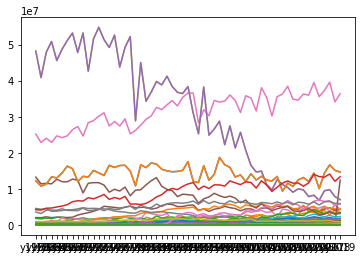

In [20]:
plt.plot(dataCropsTransposed)

## Checking the most important crops

In [25]:
dataCropsGroupedSum = dataCropsGrouped.sum(axis=1)

In [39]:
dataCropsGroupedSum.sort_values(ascending=False)

item
Cereals, Total                                 1,866,275,855.00
Roots and Tubers, Total                        1,828,499,656.00
Potatoes                                       1,828,499,656.00
Sugar Crops Primary                              829,065,651.00
Sugar beet                                       829,065,651.00
                                                     ...       
Tangerines, mandarins, clementines, satsumas               0.00
Olives                                                     0.00
Eggplants (aubergines)                                     0.00
Sorghum                                                    0.00
Almonds, with shell                                        0.00
Length: 102, dtype: float64

The most prolific crop products produced in Poland between 1961 and 2019 are:

1. Cereals                                 1,866,275,855.00
2. Roots and Tubers                        1,828,499,656.00
3. Potatoes                                1,828,499,656.00


*Deleting all the rows with 0 sum*

In [27]:
cleanDataCrops = dataCropsGroupedSum.loc[~(dataCropsGroupedSum == 0)]

*Calculating mean and median*

In [28]:
print(f"The mean is: {dataCropsGroupedSum.mean()}")
print(f"The median is: {dataCropsGroupedSum.median()}")

The mean is: 104017584.41176471
The median is: 3513392.5


*Getting all the rows above the median value (3,513,392.5)*

In [29]:
ImportantDataCrops = cleanDataCrops[cleanDataCrops > 3513392.5]

In [30]:
ImportantDataCrops.sort_values(ascending=False)

item
Cereals, Total                       1,866,275,855.00
Potatoes                             1,828,499,656.00
Roots and Tubers, Total              1,828,499,656.00
Sugar beet                             829,065,651.00
Sugar Crops Primary                    829,065,651.00
Wheat                                  548,475,796.00
Rye                                    478,709,505.00
Vegetables Primary                     318,257,567.00
Barley                                 250,100,128.00
Grain, mixed                           206,139,048.00
Oats                                   173,305,639.00
Fruit Primary                          161,324,265.00
Triticale                              140,334,976.00
Cabbages and other brassicas           108,938,501.00
Apples                                 103,404,076.00
Oilcrops                               103,082,591.00
Rapeseed                                96,419,036.00
Oilcrops, Cake Equivalent               74,778,555.00
Vegetables, fresh nes  

## Plotting the data

In [52]:
dataCropsTransposed.columns

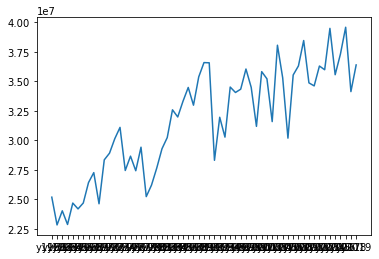

In [22]:
#Plotting cereals
plt.plot(dataCropsTransposed["Cereals, Total"])

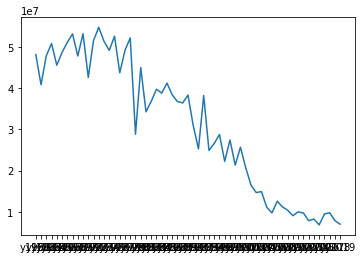

In [23]:
#Ploting "Roots and Tubers, Total"
plt.plot(dataCropsTransposed["Roots and Tubers, Total"])

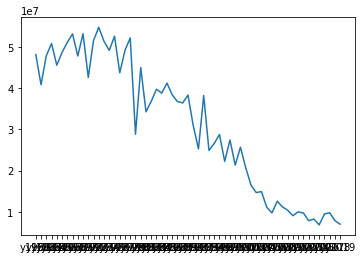

In [24]:
#Plotting "Potatoes"
plt.plot(dataCropsTransposed["Potatoes"])

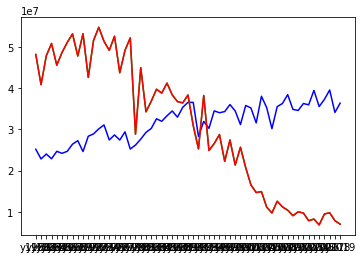

In [122]:
# Plotting the three together
plt.plot(dataCropsTransposed["Cereals, Total"], color = 'blue')
plt.plot(dataCropsTransposed["Roots and Tubers, Total"], color = "green")
plt.plot(dataCropsTransposed["Potatoes"], color = 'red')

### 5.2 GHG emission data collection procedure

The datasets of Nitrous Oxide (N2O), Methane (CH4) and Carbon dioxide (CO2), were gathered from the *databank.worldbank.org*. Those datasets were filtered using the the tools provided by the website itself to include only Poland from the period from 1971 to 2019.

In [151]:
# Loading Nitrous Oxide (N2O) dataset
data_nitrox = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\2022-02-18-tarea-phd-statistics\2019-1971-nitrous-TRANSPOSED-Poland.csv", index_col=None)

# Loading Methane (CH4) dataset
data_methane = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\2022-02-18-tarea-phd-statistics\2019-1971-methane-TRANSPOSED-Poland.csv", index_col=None)

# Loading Carbon Dioxide (CO2) dataset
data_carbondiox = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\2022-02-18-tarea-phd-statistics\2019-1971-co2-TRANSPOSED-Poland.csv", index_col=None)

*Describing the GHG variables*

In [32]:
vars_ghg_charact = ([["Variable", "Description", "Type", "Level"],
                     ["Series Name", "Nitrous Oxide, Methane, Carbon Dioxide", "String", "Nominal"],
                     ["Series Code", "Code of the series", "String", "Nominal"],
                     ["Country Name", "Poland", "String", "Nominal"],
                     ["Country Code", "POL", "String", "Nominal"],
                     ["Year", "From 1971 to 2019", "Float", "Ratio"]])

In [33]:
print(tabulate(vars_ghg_charact, headers="firstrow", tablefmt="fancy_grid"))

╒══════════════╤════════════════════════════════════════╤════════╤═════════╕
│ Variable     │ Description                            │ Type   │ Level   │
╞══════════════╪════════════════════════════════════════╪════════╪═════════╡
│ Series Name  │ Nitrous Oxide, Methane, Carbon Dioxide │ String │ Nominal │
├──────────────┼────────────────────────────────────────┼────────┼─────────┤
│ Series Code  │ Code of the series                     │ String │ Nominal │
├──────────────┼────────────────────────────────────────┼────────┼─────────┤
│ Country Name │ Poland                                 │ String │ Nominal │
├──────────────┼────────────────────────────────────────┼────────┼─────────┤
│ Country Code │ POL                                    │ String │ Nominal │
├──────────────┼────────────────────────────────────────┼────────┼─────────┤
│ Year         │ From 1971 to 2019                      │ Float  │ Ratio   │
╘══════════════╧════════════════════════════════════════╧════════╧═════════╛

In [34]:
# Hay que transformar nitrox en un objeto.
# Transponer Nitrox.
# Plotear Nitrox.
# Hacer lo mismo con los otros dos gases.

In [140]:
data_nitrox.columns

Index(['Series Name', 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)'], dtype='object')

In [142]:
pd.to_numeric(data_nitrox["Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"])


0    37,691.04
1    38,576.71
2    43,345.13
3    45,306.19
4    46,495.35
5    45,570.62
6    45,052.30
7    45,157.70
8    43,692.33
9    42,734.12
10   39,221.51
11   38,505.41
12   38,738.53
13   37,945.55
14   36,851.87
15   37,214.88
16   36,149.10
17   36,435.54
18   35,743.00
19   24,920.00
20   24,010.00
21   23,110.00
22   23,780.00
23   24,040.00
24   24,550.00
25   24,600.00
26   25,110.00
27   23,650.00
28   23,270.00
29   23,720.00
30   23,500.00
31   23,040.00
32   23,670.00
33   23,760.00
34   24,590.00
35   24,670.00
36   25,570.00
37   24,350.00
38   21,020.00
39   21,740.00
40   21,420.00
41   21,890.00
42   21,030.00
43   20,500.00
44   20,680.00
45   21,620.00
46   21,550.00
47   21,480.00
Name: Nitrous oxide emissions (thousand metric tons of CO2 equivalent), dtype: float64

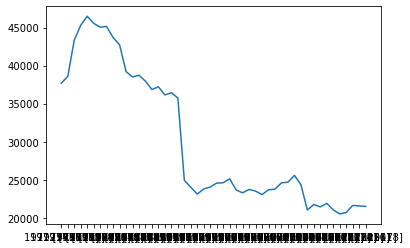

In [149]:
plt.plot(data_nitrox["Series Name"], data_nitrox["Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"])

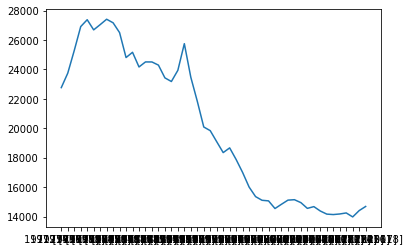

In [152]:
plt.plot(data_methane["Year"], data_methane["Agricultural methane emissions (thousand metric tons of CO2 equivalent)"])

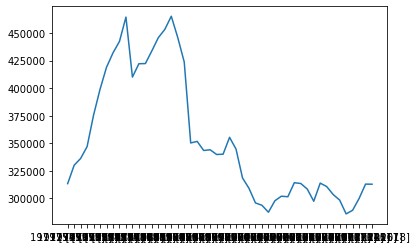

In [153]:
plt.plot(data_carbondiox["Year"], data_carbondiox["CO2 emissions (kt)"])

## 6. Data analysis

*Exploring the dataset*

In [ ]:
# Planear qué análisis haré y cuáles gráficos.
# En teoría debe ser una regresión, una serie de tiempo y estadísticas descriptivas de x (crops dataset)

data_crops["year"].describe()

KeyError: 'year'

## Subseting Poland

#### Subseting Poland from the global dataset and then transforming the "dt" column into a Python Date time object.

In [ ]:
data_poland = global_data[global_data["Country"]=="Poland"].copy()
data_poland["dt"] = pd.to_datetime(data_poland["dt"])

*Checking the amount of NAN in the data set*

In [ ]:
data_poland.isna().sum()

dt                                0
AverageTemperature               73
AverageTemperatureUncertainty    73
Country                           0
dtype: int64

*deleting the NAN in the dataset*

In [ ]:
data_poland = data_poland.dropna()

In [ ]:
data_poland.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

*Grouping data by year*

In [ ]:
annual_mean_Poland = data_poland.groupby(data_poland["dt"].dt.year).mean()
annual_mean_Poland

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1743,3.937000,2.057000
1744,9.321125,2.025375
1745,-0.971750,1.790500
1750,8.344818,2.028636
1751,8.283625,1.974625
...,...,...
2009,8.652917,0.232667
2010,7.621417,0.221750
2011,8.951667,0.269667


*Reference mean temperature of the 1951-1980 period to establish the global base mean temperature. This is standard practice in climate science.*

In [ ]:
reference_temperature_poland = annual_mean_Poland.loc[1951:1980].mean()["AverageTemperature"]
annual_mean_Poland["Anomaly"] = annual_mean_Poland["AverageTemperature"] - reference_temperature_poland

### Plotting

In [ ]:
annual_mean_Poland

,AverageTemperature,AverageTemperatureUncertainty,Anomaly
dt,,,
1743,3.937000,2.057000,-3.637175
1744,9.321125,2.025375,1.746950
1745,-0.971750,1.790500,-8.545925
1750,8.344818,2.028636,0.770643
1751,8.283625,1.974625,0.709450
...,...,...,...
2009,8.652917,0.232667,1.078742
2010,7.621417,0.221750,0.047242
2011,8.951667,0.269667,1.377492


In [ ]:
y = annual_mean_Poland["AverageTemperature"]
y_mean = [np.mean]

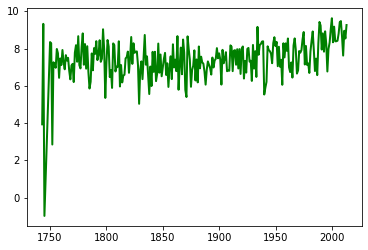

In [ ]:
plt.plot(annual_mean_Poland["AverageTemperature"],
         color = "green",
         linewidth = 2,
         markersize = 12)

{'whiskers': [<matplotlib.lines.Line2D at 0x15d5c3020a0>,
 'caps': [<matplotlib.lines.Line2D at 0x15d5c302760>,
 'boxes': [<matplotlib.lines.Line2D at 0x15d5c2b3d00>,
 'medians': [<matplotlib.lines.Line2D at 0x15d5c302e20>,
 'fliers': [<matplotlib.lines.Line2D at 0x15d5c30e1c0>,
 'means': []}

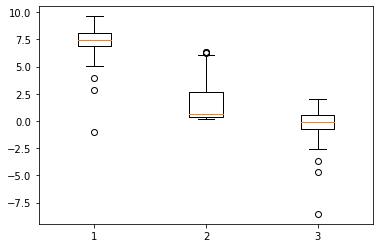

In [ ]:
plt.boxplot(annual_mean_Poland)

(array([  1.,   0.,   0.,   1.,   1.,   2.,  29., 105., 103.,  25.]),
 array([-0.97175   ,  0.08764167,  1.14703333,  2.206425  ,  3.26581667,
         4.32520833,  5.3846    ,  6.44399167,  7.50338333,  8.562775  ,
         9.62216667]),
 <BarContainer object of 10 artists>)

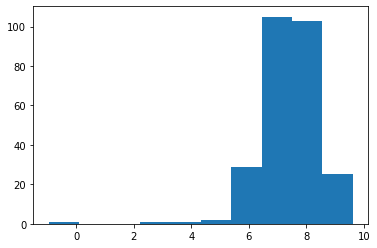

In [ ]:
plt.hist(annual_mean_Poland["AverageTemperature"])

<AxesSubplot:xlabel='Anomaly', ylabel='AverageTemperature'>

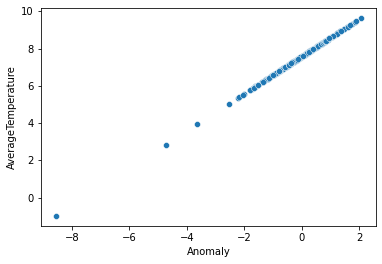

In [ ]:
sns.scatterplot(x="Anomaly", y= "AverageTemperature", data = annual_mean_Poland)